In [1]:
import pandas as pd
import numpy as np


# Load Datasets

In [2]:
ctrl = pd.read_csv('Ctrl_generation.csv')


In [3]:
ctrl = pd.read_csv('Ctrl_generation.csv')
gpt = pd.read_csv('GPT_generation.csv')
gpt2 = pd.read_csv('gpt2_generate.csv')

grover = pd.read_csv('Grover_Generate.csv')
xlm = pd.read_csv('xlm_generation.csv')
xlnet = pd.read_csv('xlnet_generation.csv')

pplm = pd.read_csv('pplm.csv')
human = pd.read_csv('processed_data.csv')
em_lm = pd.read_csv('generation_em_lm.csv')

titles = pd.read_csv('Titles.csv')

In [4]:
titles['Title'][427]

"Social media use may harm teens' mental health by disrupting positive activities, study says"

In [4]:
xlnet['Generation'][427]

'[\'Social media use may harm teens\\\' mental health by disrupting positive activities, study says. ()?//2/1 pm “Hello! Hey!” and the sound of a car running in front or behind you are not necessarily your best ideas for stimulating brain activity while driving around town on an evening night at work; however they can be fun distractions when you have to do something that requires some sort if concentration during those long hours after dark with no one else home but yourself as well as being a great way out from having to think about anything serious because it is just someone who wants what we want right now so let us go get them whatever our problem might really even involve which usually involves getting up early before dawn going into traffic all over city streets trying desperately enough to find their elusive object yet still having time left until lunch hour where everyone has gone back inside making dinner then heading off again once more onto busy cities roads looking vainly 

In [5]:
human = human['Articles']

human = pd.DataFrame({'Generation': list(human)})

In [6]:
ctrl = ctrl[['Generation']]
gpt = gpt[['Generation']]
gpt2 = gpt2[['Generation']]

grover = grover[['Generation']]
xlm = xlm[['Generation']]
xlnet = xlnet[['Generation']]

pplm = pplm[['Generation']]
human = human[['Generation']]
em_lm = em_lm[['Generation']]

In [7]:
ctrl['label'] = 'ctrl' #1066
gpt['label'] = 'gpt'   #2132
gpt2['label'] = 'gpt2' #3198

grover['label'] = 'grover' #4264
xlm['label'] = 'xlm'       #5330
xlnet['label'] = 'xlnet'   #6396

pplm['label'] = 'pplm'    #7462
human['label'] = 'human'  #8528
em_lm['label'] = 'fair'   #

# Data Preparation and Cleaning 

In [8]:
def add_title(gen):
    new_text = []
    for i in range(len(gen)):
        new_text.append( titles['Title'][i] + " " + gen[i])
        
    return new_text

In [10]:
import json 


In [11]:
import re
from cleantext import clean

def clean_individual_texts(data):
    gen_text = []

    for i in data['Generation']:
#         words = ''.join([str(elem) for elem in i]) 
#         words = words.split()
        gen_text.append("".join(eval(i)))
        
    
    new_gen = []
    for i in gen_text:
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
#         ans = re.sub('CNN', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen, 'label': data['label']})

In [12]:
ctrl = clean_individual_texts(ctrl)


In [13]:
# ctrl = clean_individual_texts(ctrl)
xlm = clean_individual_texts(xlm)
xlnet = clean_individual_texts(xlnet)
gpt = clean_individual_texts(gpt)
grover = clean_individual_texts(grover)

gpt2 = clean_individual_texts(gpt2)


In [14]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen, 'label': data['label']})

In [15]:


pplm = clean_individual_texts(pplm)
human = clean_individual_texts(human)

fair = clean_individual_texts(em_lm)

In [16]:
grover['Generation'] = add_title(grover['Generation'])
human['Generation'] = add_title(human['Generation'])

# Get Similar Texts

In [17]:
gpt2['Generation'][12]

'the 30 most troubling lines from donald trump s latest news conference on coronavirus the 15 most disturbing lines from donald trump s latest news conference on coronavirus the 15 most disturbing lines from donald trump s latest news conference on coronavirus the 15 most disturbing lines from donald trump s latest news conference on coronavirus the 15 most disturbing lines from donald trump s latest news conference on coronavirus the 15 most disturbing lines from donald trump s latest news conference on coronavirus the 15 most disturbing lines from donald trump s latest news conference on coronavirus the 15 most disturbing lines from donald trump s latest news conference on coronavirus the 15 most disturbing lines from donald trump s latest news conference on coronavirus the 15 most disturbing lines from donald trump s latest news conference on coronavirus the 15 most disturbing lines from donald trump s latest news conference on coronavirus the 15 most disturbing lines from donald tr

In [18]:
gpt['Generation'][10]

'putin and xi are using the coronavirus crisis to extend their control across the world trump is struggling to keep up with them in a war that has been going on for decades now but he s still not strong enough i m sorry about your family it must be hard being so far away from home she said softly yes we re all very lonely here there wasn t much time before they were taken by the chinese government so it would have been nice if you could visit us more often yeah me too what do you think of china well you know how many people live at our house i mean there are plenty who share my views about the economy and trade which makes this place feel like one big happy family oh really her eyes widened as she looked around the room where did everyone else go when they left some went back into town others stayed behind after work or even moved out to another city most just took off for new york canada mexico maybe california you never see any families of yours anywhere except on tv shows wow that s

In [19]:
xlnet['Generation'][427]

'social media use may harm teens mental health by disrupting positive activities study says 2 1 pm hello hey and the sound of a car running in front or behind you are not necessarily your best ideas for stimulating brain activity while driving around town on an evening night at work however they can be fun distractions when you have to do something that requires some sort if concentration during those long hours after dark with no one else home but yourself as well as being a great way out from having to think about anything serious because it is just someone who wants what we want right now so let us go get them whatever our problem might really even involve which usually involves getting up early before dawn going into traffic all over city streets trying desperately enough to find their elusive object yet still having time left until lunch hour where everyone has gone back inside making dinner then heading off again once more onto busy cities roads looking vainly everywhere hoping s

# Summary Statistics

In [22]:
from nltk import tokenize
from nltk.tokenize import word_tokenize

In [30]:
def stat(data):
    word = []
    sent = []
    
    for i in data:
        word.append(len(word_tokenize(i)))
        sent.append(len(tokenize.sent_tokenize(i)))
        
    final_list = [x for x in word if (x > np.mean(word) - 2 * np.std(word))]
    new_word = [x for x in final_list if (x < np.mean(word) + 2 * np.std(word))]
    
    final_list = [x for x in sent if (x > np.mean(sent) - 2 * np.std(sent))]
    new_sent = [x for x in final_list if (x < np.mean(sent) + 2 * np.std(sent))]
        
    return pd.DataFrame({'Avg_word': np.mean(new_word), 
                         'SD_word': np.std(new_word),
                         'Avg_sent': np.mean(new_sent),
                         'SD_sent': np.std(new_sent)}, index=[0])
        

In [24]:
h = []
sent = []


for i in range(len(human['Generation'])):
    if len(word_tokenize(human['Generation'][i])) > 100 and len(word_tokenize(human['Generation'][i])) < 1000:   
        h.append(len(word_tokenize(human['Generation'][i])))
        sent.append(len(tokenize.sent_tokenize(human['Generation'][i])))
    

In [106]:
len(h)

776

In [108]:
np.std(h)

270.8168518681075

In [110]:
np.std(sent)

19.489501861012595

In [82]:
ctrl_stat = stat(ctrl['Generation'])

In [83]:
ctrl_stat

,Avg_word,SD_word,Avg_sent,SD_sent
0,530.185325,72.19072,32.502356,18.968928


In [60]:
h = []
for i in human['Generation']:
    h.append(len(word_tokenize(i)))

In [66]:
from statistics import stdev 

In [72]:
new_h = []

for i in h:
    if i <= 1000:
        new_h.append(i)

In [75]:
len(new_h)

919

In [74]:
np.std(new_h)

286.33304315182176

In [25]:
gpt_stat = stat(gpt['Generation'])
gpt2_stat = stat(gpt2['Generation'])

grover_stat = stat(grover['Generation'])
xlm_stat = stat(xlm['Generation'])

xlnet_stat = stat(xlnet['Generation'])
pplm_stat = stat(pplm['Generation'])

human_stat = stat(human['Generation'])
fair_stat = stat(fair['Generation'])

C:\Users\Adaku\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Adaku\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Adaku\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Adaku\Anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Adaku\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [31]:
human_stat = stat(human['Generation'])
human_stat

,Avg_word,SD_word,Avg_sent,SD_sent
0,736.589094,695.864323,1.0,0.0


# Save individual (i.e. 9) datasets

In [20]:
ctrl.to_csv('new_ctrl.csv')
gpt.to_csv('new_gpt.csv')

gpt2.to_csv('new_gpt2.csv')
grover.to_csv('new_grover.csv')

xlm.to_csv('new_xlm.csv')
xlnet.to_csv('new_xlnet.csv')

pplm.to_csv('new_pplm.csv')
human.to_csv('new_human.csv')

fair.to_csv('new_fair.csv')

# Build combined datasets 

In [17]:
generate = pd.concat([ctrl, gpt, gpt2, grover, xlm, xlnet, pplm, human, em_lm])

In [18]:
list(generate['Generation'])[8050]

"China coronavirus: Xi Jinping visits virus-hit Wuhan in major show of confidence hong kong (cnn) chinese president xi jinping has made his first visit to wuhan since the novel coronavirus outbreak began more than two months ago, as new cases of the virus slowed to a trickle in the country where the disease first emerged. xi's visit to wuhan -- which has been on lockdown for weeks now, with tens of thousands of confirmed cases of the virus and hundreds of deaths -- is a major show of confidence in china's response to the pandemic , underlining a message which has been building in state media that the country has turned a corner. as of tuesday, there have been 80,754 cases of the virus confirmed across china, 67,760 of which were in hubei, the province of which wuhan is the capital. of the 3,136 deaths confirmed in china, all but 112 have been in hubei. at its worst, hubei was reporting thousands of new cases per day. on monday, china's national health commission said there were only 17

In [19]:
generate['label'].unique()

array(['ctrl', 'gpt', 'gpt2', 'grover', 'xlm', 'xlnet', 'pplm', 'human',
       'fair'], dtype=object)

In [56]:
label = []

for i in generate['label']:
    if i == 'ctrl':
        label.append(0)
    elif i == 'gpt':
        label.append(1)
    elif i == 'gpt2':
        label.append(2)
    elif i == 'grover':
        label.append(3)
    elif i == 'xlm':
        label.append(4)
    elif i == 'xlnet':
        label.append(5)
    elif i == 'pplm':
        label.append(6)
    elif i == 'human':
        label.append(7)
    elif i == 'fair':
        label.append(8)
    else:
        label.append(7)
  
        
        

# Save combined dataset

In [20]:
import csv 

In [21]:
generation = pd.DataFrame({'text': generate['Generation'], 'class': generate['label']})

In [22]:
# generation.to_csv('input_punctuation.csv', index=False, header=True)

In [60]:
generation.to_csv('input.csv', index = False, header = True, sep='\t')

In [62]:
generate.sample(len(generate))

,Generation,label
711,Asheville's woes are the story of America's po...,fair
541,Local animal shelter offers unique adoption pr...,grover
864,amid coronavirus anxiety should i stop making ...,xlnet
650,2020 tokyo summer olympics fast facts who star...,xlnet
654,"When cats are free to roam, wildlife suffers. ...",fair
...,...,...
60,'The Banker' yields a modest return on Apple's...,grover
35,orlando bloom coming home to self quarantine i...,gpt
725,the trump administration is hiding something w...,xlnet
529,These states have been hit the hardest by coro...,human


# Exploring POS features

In [30]:
import nltk

In [31]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Adaku\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [267]:
toke = []
for i in gen:
    toke.append(i.split())
    
pos = []

for i in toke:
    pos.append(nltk.pos_tag(i))

# Multi-class Classification 

In [27]:

import numpy as np
import pandas as pd 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


In [29]:
from yellowbrick.classifier import ClassPredictionError
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

C:\Users\Adaku\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, FixedLocator
import matplotlib

In [31]:
def classify(data, label):
            
    
    X_train, X_test, y_train, y_test = train_test_split(data, label, stratify = label, test_size = 0.2, random_state = 1234)
    
    clf = RandomForestClassifier(random_state=1234,n_estimators=150,n_jobs=-1)
#     clf = LogisticRegression(solver = 'lbfgs',multi_class='auto')
    
    v = TfidfVectorizer()
    
    train_corpus = X_train
#     train_corpus = [[word.lower() for word in text.split()] for text in data]

    test_corpus = X_test
#     test_corpus = [" ".join(x) for x in test_corpus]

#     ax = axes.set_ylim([0,300])
    train_vector = v.fit_transform(train_corpus)
    test_vector = v.transform(test_corpus)
    
    fit = clf.fit(train_vector,y_train)
    pred = clf.predict(test_vector)
    
    # Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(clf, classes= ['human', 'ctrl', 'gpt', 'gpt2', 'grover', 'xlm', 'xlnet', 'pplm', 'fair'])

    # Fit the training data to the visualizer
    visualizer.fit(train_vector, y_train)

    # Evaluate the model on the test data
    visualizer.score(test_vector, y_test)

    # Draw visualization
    visualizer.show()
    
    
    matrix = confusion_matrix(y_test, pred, labels = ['ctrl', 'gpt', 'gpt2', 'grover', 'xlm', 'xlnet', 'pplm', 'human', 'fair'])
    mat = matrix.diagonal()/matrix.sum(axis=1)
    print(classification_report(y_test, pred, labels = ['ctrl', 'gpt', 'gpt2', 'grover','xlm', 'xlnet', 'pplm', 'human', 'fair'],
                                digits=4))
    print('confusion matrix: ', mat)
    
    Accuracy = accuracy_score(y_test,pred)
    F1 = f1_score(y_test, pred, average='macro')
    print("Accuracy:", Accuracy)
    
    rec = recall_score(y_test, pred, average='macro')
    print('Recall: ', rec)
    prec = precision_score(y_test, pred, average='macro')
    print('Precision: ', prec)
    
    print('F1:', F1)
    
    return clf, v

C:\Users\Adaku\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


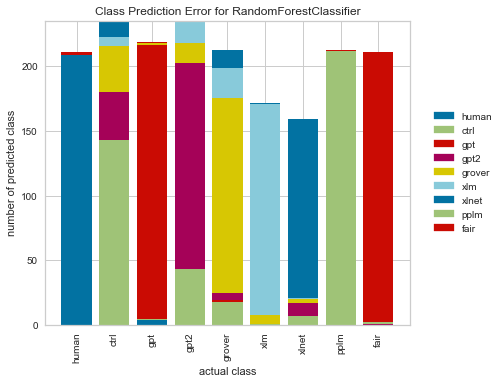

              precision    recall  f1-score   support

        ctrl     0.9905    0.9812    0.9858       213
         gpt     0.9680    0.9953    0.9815       213
        gpt2     0.5948    0.7477    0.6625       214
      grover     0.7089    0.7089    0.7089       213
         xlm     0.9953    0.9953    0.9953       213
       xlnet     0.9905    0.9812    0.9858       213
        pplm     0.8679    0.6449    0.7399       214
       human     0.9477    0.7653    0.8468       213
        fair     0.5675    0.6714    0.6151       213

    accuracy                         0.8322      1919
   macro avg     0.8479    0.8323    0.8357      1919
weighted avg     0.8478    0.8322    0.8356      1919

confusion matrix:  [0.98122066 0.99530516 0.74766355 0.70892019 0.99530516 0.98122066
 0.64485981 0.76525822 0.6713615 ]
Accuracy: 0.8322042730588849
Recall:  0.8323461015313062
Precision:  0.8479065932468655
F1: 0.8357426908455609


In [32]:
rd, v = classify(generate['Generation'], generate['label'])

# Feature Importance

In [41]:
words = v.get_feature_names()
importance = rd.feature_importances_

In [48]:
# Looking at the most important words inside the random forest for tfidf
words = v.get_feature_names()
importance = rd.feature_importances_
impordf = pd.DataFrame({'Word' : words,'Importance' : importance})
impordf = impordf.sort_values(['Importance', 'Word'], ascending=[0, 1])
impordf.head(70)

,Word,Importance
45116,nthe,0.008699
6619,and,0.007101
62490,the,0.006788
63366,to,0.005807
46085,of,0.005279
...,...,...
7023,anything,0.002089
55116,said,0.002082
28815,he,0.002054
58444,so,0.002025


# Figures